#Unemployment Analysis with Python

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# Load the dataset
data = pd.read_csv('/content/Unemployment in India.csv')

In [34]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [35]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [36]:
# Fill missing values in categorical columns with the mode
data['Region'].fillna(data['Region'].mode()[0], inplace=True)
data[' Frequency'].fillna(data[' Frequency'].mode()[0], inplace=True)
data['Area'].fillna(data['Area'].mode()[0], inplace=True)

In [37]:
# Fill missing values in numerical columns with the mean
data[' Estimated Unemployment Rate (%)'].fillna(data[' Estimated Unemployment Rate (%)'].mean(), inplace=True)
data[' Estimated Employed'].fillna(data[' Estimated Employed'].mean(), inplace=True)
data[' Estimated Labour Participation Rate (%)'].fillna(data[' Estimated Labour Participation Rate (%)'].mean(), inplace=True)

In [38]:
# Drop rows with missing 'Date' values
data.dropna(subset=[' Date'], inplace=True)

In [39]:
# Recheck missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [40]:
# Convert the 'Date' column to datetime format
data[' Date'] = pd.to_datetime(data[' Date'])

<ipython-input-40-b065611607b3>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[' Date'] = pd.to_datetime(data[' Date'])


In [41]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                                Date   Estimated Unemployment Rate (%)  \
count                            740                        740.000000   
mean   2019-12-12 18:36:58.378378496                         11.787946   
min              2019-05-31 00:00:00                          0.000000   
25%              2019-08-31 00:00:00                          4.657500   
50%              2019-11-30 00:00:00                          8.350000   
75%              2020-03-31 00:00:00                         15.887500   
max              2020-06-30 00:00:00                         76.740000   
std                              NaN                         10.721298   

        Estimated Employed   Estimated Labour Participation Rate (%)  
count         7.400000e+02                                740.000000  
mean          7.204460e+06                                 42.630122  
min           4.942000e+04                                 13.330000  
25%           1.190404e+06  

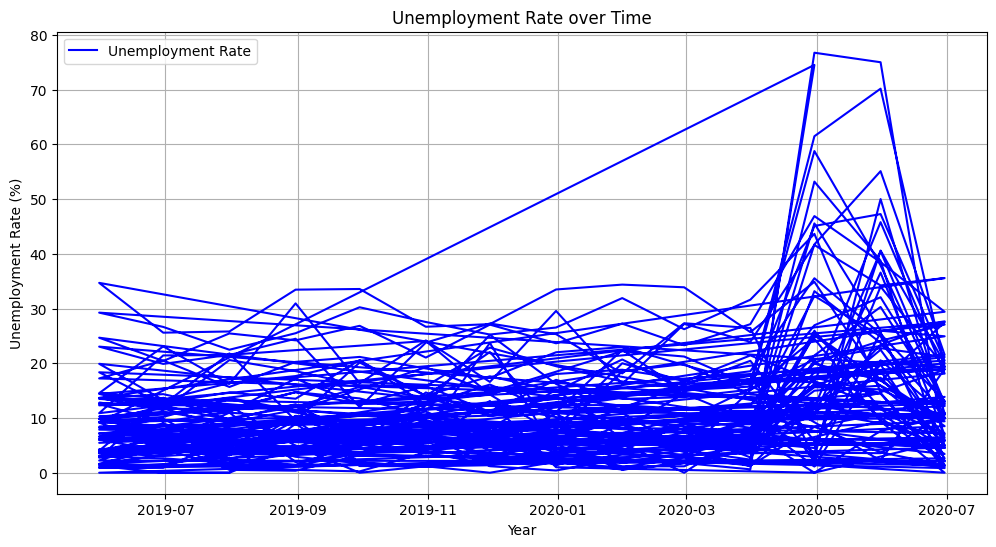

In [42]:
# Visualization 1: Plot Unemployment Rate over time
plt.figure(figsize=(12, 6))
plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'], label='Unemployment Rate', color='blue')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate over Time')
plt.legend()
plt.grid(True)
plt.show()

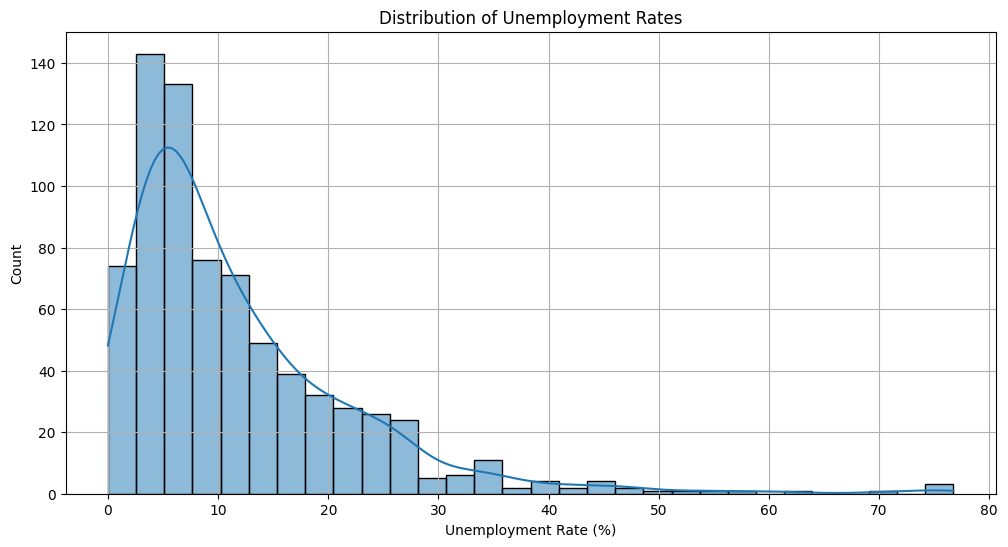

In [43]:
# Visualization 2: Distribution of Unemployment Rates
plt.figure(figsize=(12, 6))
sns.histplot(data[' Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.xlabel('Unemployment Rate (%)')
plt.title('Distribution of Unemployment Rates')
plt.grid(True)
plt.show()

In [44]:
# Calculate correlation matrix
correlation_matrix = data[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()

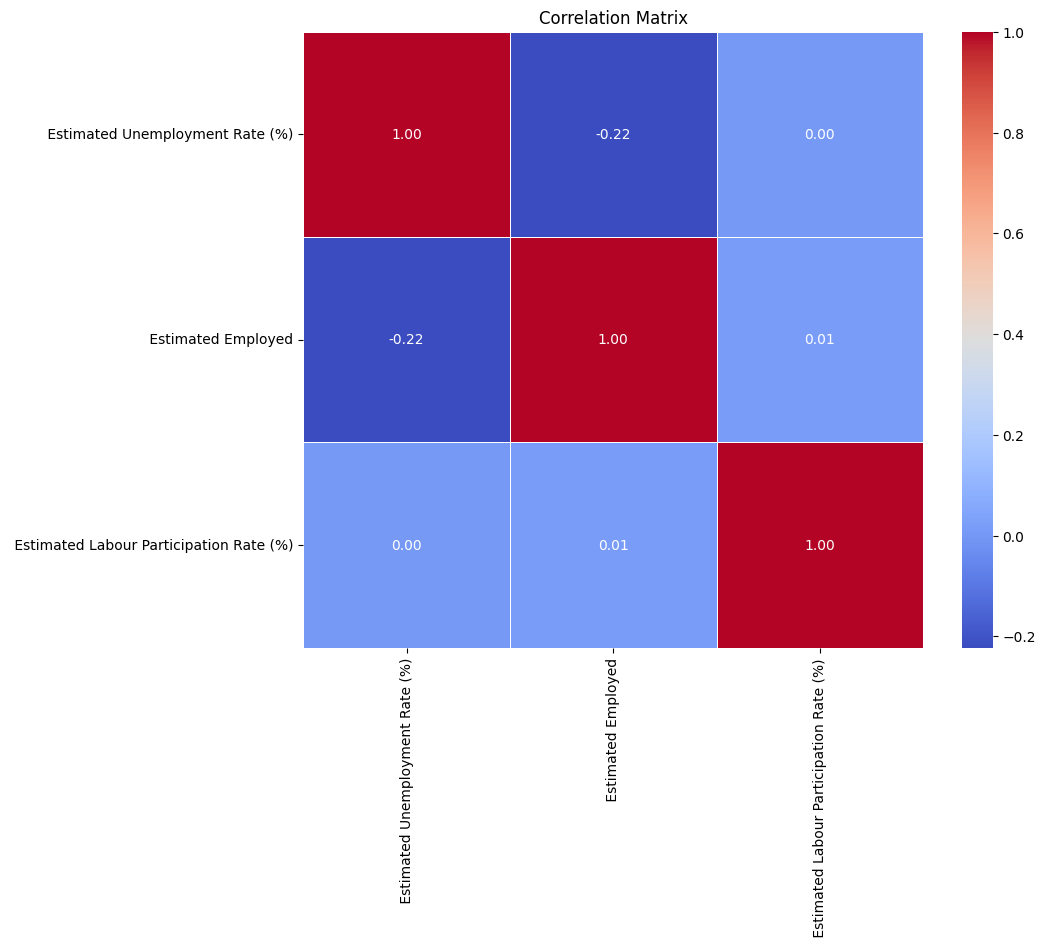

In [45]:
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

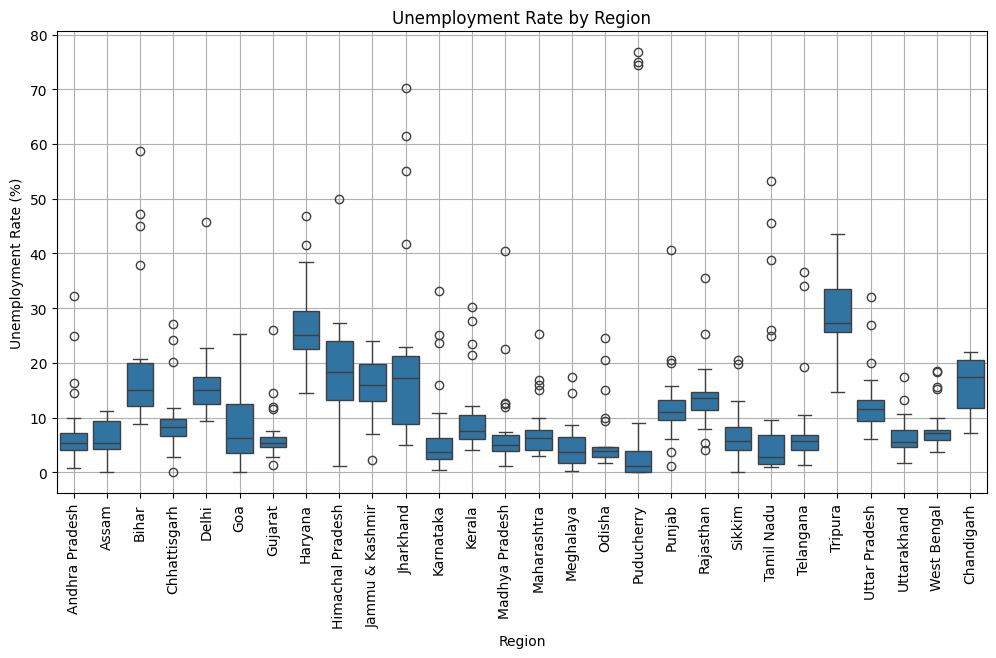

In [46]:
# Visualization 4: Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.grid(True)
plt.show()

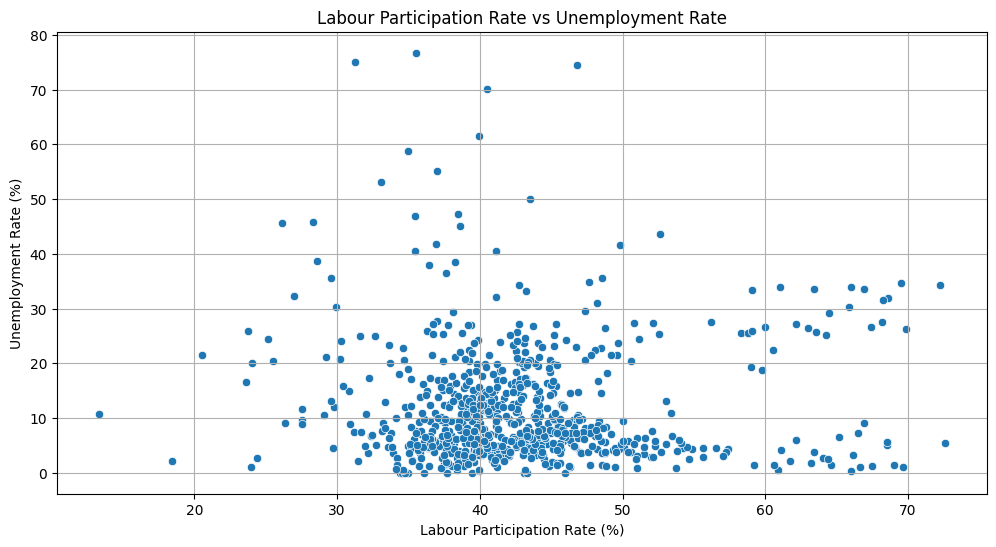

In [47]:
# Visualization 5: Labour Participation Rate vs Unemployment Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)', data=data)
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Labour Participation Rate vs Unemployment Rate')
plt.grid(True)
plt.show()

In [48]:
# Preprocessing: Removing outliers in 'Estimated Unemployment Rate (%)'
q1 = data[' Estimated Unemployment Rate (%)'].quantile(0.25)
q3 = data[' Estimated Unemployment Rate (%)'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
data_cleaned = data[(data[' Estimated Unemployment Rate (%)'] >= lower_bound) &
                    (data[' Estimated Unemployment Rate (%)'] <= upper_bound)]

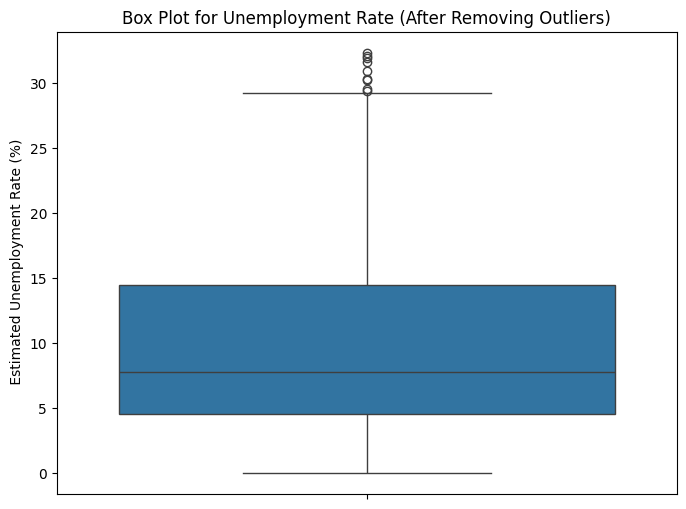

In [49]:
# Visualization 6: Box plot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned[' Estimated Unemployment Rate (%)'])
plt.title("Box Plot for Unemployment Rate (After Removing Outliers)")
plt.show()

In [50]:
# One-hot encode the 'Region' column
data_cleaned = pd.get_dummies(data_cleaned, columns=['Region'], drop_first=True)

In [51]:
# Split the cleaned dataset into features and target variable
X_cleaned = data_cleaned.drop(columns=[' Estimated Unemployment Rate (%)', ' Date', 'Area', ' Frequency'])
y_cleaned = data_cleaned[' Estimated Unemployment Rate (%)']

In [52]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [53]:
# Define base models for stacking
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression())
]

In [54]:
# Define the stacking model with base models and final estimator
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

In [55]:
# Initialize the scaler for feature scaling
scaler = StandardScaler()

In [56]:
# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

In [57]:
# Train the stacked model on the scaled data
stacked_model.fit(X_train_scaled, y_train_cleaned)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

In [58]:
# Make predictions on the test set
y_pred_scaled = stacked_model.predict(X_test_scaled)

In [59]:
# Evaluation metrics: MAE, RMSE, and R-squared for scaled model
mae_scaled = mean_absolute_error(y_test_cleaned, y_pred_scaled)
rmse_scaled = mean_squared_error(y_test_cleaned, y_pred_scaled, squared=False)
r2_scaled = r2_score(y_test_cleaned, y_pred_scaled)

In [60]:
# Print evaluation results
print(f"\nEvaluation of Scaled Stacked Model:")
print(f"Mean Absolute Error (MAE): {mae_scaled}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled}")
print(f"R-squared: {r2_scaled}")


Evaluation of Scaled Stacked Model:
Mean Absolute Error (MAE): 3.1433893114044342
Root Mean Squared Error (RMSE): 4.699748038970098
R-squared: 0.6153219419428386
